In [4]:
from sklearn.datasets import make_classification
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

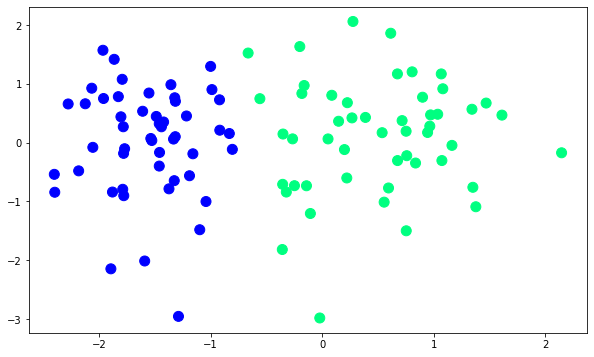

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [14]:
def step(z):
    return 1 if z>0 else 0

In [15]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [16]:
intercept_,coef_=perceptron(X,y)

In [17]:
intercept_

1.0

In [18]:
coef_

array([1.40815218, 0.11878387])

In [19]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [20]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

In [21]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [47]:
def perceptron2(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(5000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [48]:
intercept_,coef_=perceptron(X,y)

In [49]:
intercept_

1.0

In [50]:
coef_

array([1.41520345, 0.12328464])

In [51]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [52]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
lr.fit(X,y)

LogisticRegression()

In [55]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

In [56]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input3 + b

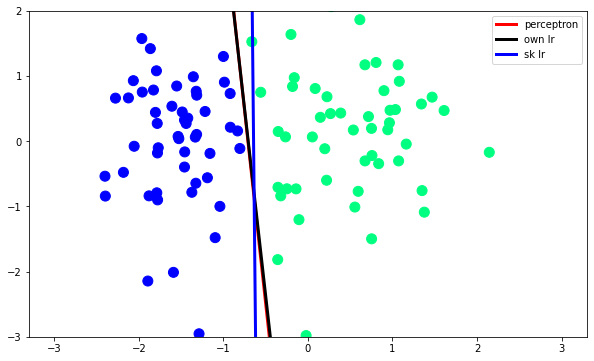

In [61]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='red',linewidth=3,label='perceptron')      # perceptron
plt.plot(x_input2,y_input2,color='black',linewidth=3,label='own lr')   # Own Logistic Regression
plt.plot(x_input3,y_input3,color='blue',linewidth=3,label='sk lr')  #Logistic Regression
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()

## Logistic Regression Using GD

In [78]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(10000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [79]:
coef_,intercept_=gd(X,y)

In [80]:
coef_

array([14.66081824,  1.12109657])

In [81]:
intercept_

9.722852401877878

In [82]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [83]:
x_input4 = np.linspace(-3,3,100)
y_input4 = m*x_input4 + b

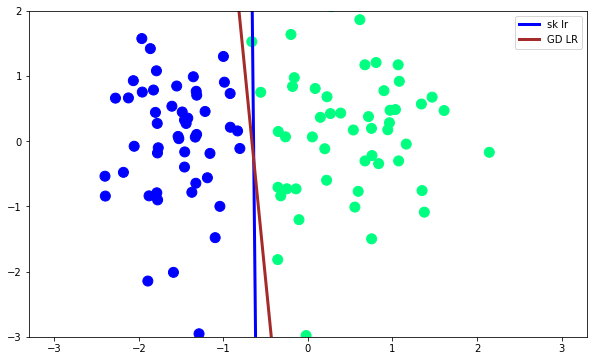

In [84]:
plt.figure(figsize=(10,6))
# plt.plot(x_input1,y_input1,color='red',linewidth=3,label='perceptron')      # perceptron
# plt.plot(x_input2,y_input2,color='black',linewidth=3,label='own lr')   # Own Logistic Regression
plt.plot(x_input3,y_input3,color='blue',linewidth=3,label='sk lr')  #Logistic Regression
plt.plot(x_input4,y_input4,color='brown',linewidth=3,label='GD LR')  #Gradien Descent
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()